In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import Dense,Dropout
import matplotlib.pyplot as plt
import seaborn as sn
from collections import Counter
from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.


In [2]:
df=pd.read_csv("train.csv")

# EDA

In [3]:
df.head()

,Index,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,2.245295,-1.160960,-1.966682,-1.430190,-0.607246,-1.508696,-0.074415,-0.655096,-1.970141,...,0.010490,0.521714,-0.064971,0.048849,0.383290,0.103970,-0.047350,-0.064800,74.75,0
1,1,1.278609,0.102574,0.512079,0.003930,-0.723474,-1.334105,0.029958,-0.296595,0.128119,...,-0.081470,-0.182506,0.078986,0.789993,0.219794,0.938359,-0.078720,0.008119,1.38,0
2,2,1.466457,0.026088,-0.499298,-0.674372,-0.144883,-1.178075,0.058089,-0.420145,-1.359651,...,-0.234087,-0.710542,-0.001242,-0.174713,0.533719,-0.454779,0.001524,0.030935,10.95,0
3,3,-0.922137,-0.371579,2.132018,-0.796997,0.324175,-1.162006,0.277208,-0.249586,-0.775648,...,-0.302654,-0.246899,-0.045745,0.677110,0.016109,-0.734220,-0.034480,-0.064786,8.04,0
4,4,-1.166525,0.255439,2.108464,0.135019,-0.072979,0.910821,0.755918,0.355528,-0.422820,...,0.136470,0.017496,0.121017,0.636266,0.492943,-0.750242,0.029124,0.091303,175.00,0


In [4]:
df.describe()

,Index,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,...,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000
mean,142227.000000,0.000779,-0.000811,0.001275,-0.000793,0.000592,0.000186,0.000951,-0.000270,0.000505,...,-0.000171,-0.000050,0.000027,0.000018,-0.000051,0.000028,-0.000037,-0.000028,88.359646,0.001547
std,82115.229749,1.956147,1.650234,1.510626,1.414216,1.378329,1.332161,1.232971,1.190897,1.097805,...,0.732765,0.725495,0.624473,0.605645,0.521274,0.482243,0.403488,0.330127,250.177771,0.039299
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,71113.500000,-0.920117,-0.598750,-0.889749,-0.848835,-0.691343,-0.768227,-0.553788,-0.208633,-0.642669,...,-0.228434,-0.542432,-0.161861,-0.354545,-0.317194,-0.326951,-0.070845,-0.052957,5.600000,0.000000
50%,142227.000000,0.018330,0.065238,0.179953,-0.020206,-0.054243,-0.274172,0.040265,0.022328,-0.051183,...,-0.029520,0.006675,-0.011192,0.040977,0.016461,-0.052077,0.001337,0.011238,22.000000,0.000000
75%,213340.500000,1.315693,0.803357,1.027332,0.742635,0.612015,0.398641,0.570515,0.327214,0.597346,...,0.186326,0.528481,0.147659,0.439527,0.350697,0.240929,0.091023,0.078271,77.200000,0.000000
max,284454.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [5]:
df.isnull().sum()

Index     0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Handling Imbalance Dataset problem

In [6]:
value=Counter(df.Class)
value

Counter({0: 284015, 1: 440})

<BarContainer object of 2 artists>

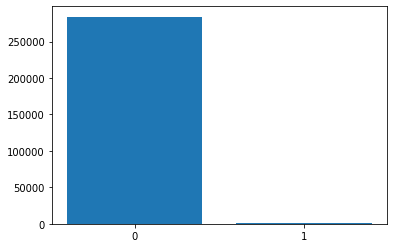

In [7]:
plt.bar(list(("0","1")),list(value.values()))

In [8]:
x=df.iloc[:,1:30]
y=df.iloc[:,30]

In [9]:
balance=SMOTE()
x_re,y_re=balance.fit_resample(x,y)

In [10]:
value_after=Counter(y_re)

<BarContainer object of 2 artists>

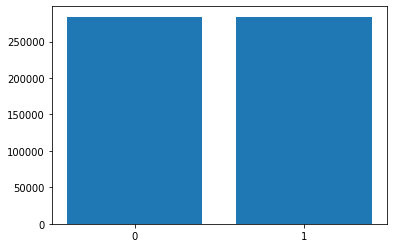

In [11]:
plt.bar(list(("0","1")),list(value_after.values()))

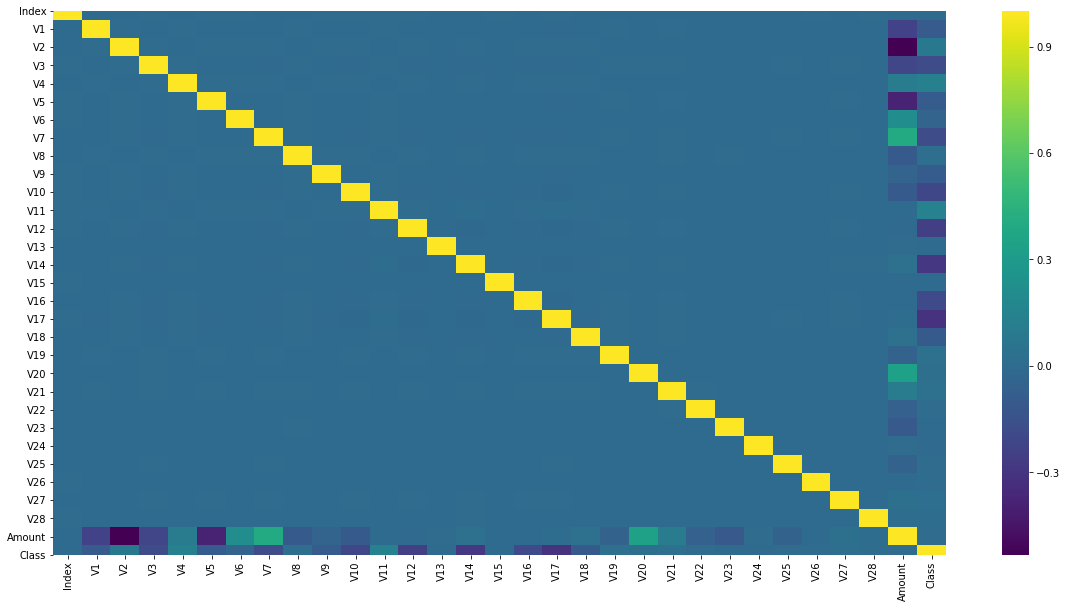

In [14]:
plt.figure(figsize=(20,10))
sn.heatmap(df.corr(),cmap="viridis")

# Spliting Data for training and test

In [76]:
x_train,x_test,y_train,y_test=train_test_split(x_re,y_re,random_state=0)

In [77]:
#scaling the values
scale=StandardScaler()
x_train_scale=scale.fit_transform(x_train)
x_test_scale=scale.transform(x_test)

# Creating Model 

In [78]:
model=Sequential()
model.add(Dense(30,activation="relu",input_dim=29))
model.add(Dense(50,activation="relu"))
model.add(Dropout(.25))
model.add(Dense(1,activation="sigmoid"))

In [79]:
model.compile(loss="binary_crossentropy",optimizer='adam',metrics=["accuracy"])

In [80]:
history=model.fit(x_train_scale,y_train,validation_data=(x_test_scale,y_test),epochs=10,batch_size=50)

Train on 426022 samples, validate on 142008 samples
Epoch 1/10
426022/426022 [==============================] - 19s 44us/step - loss: 0.0505 - accuracy: 0.9816 - val_loss: 0.0153 - val_accuracy: 0.9960
Epoch 2/10
426022/426022 [==============================] - 19s 44us/step - loss: 0.0121 - accuracy: 0.9966 - val_loss: 0.0079 - val_accuracy: 0.9979
Epoch 3/10
426022/426022 [==============================] - 19s 45us/step - loss: 0.0077 - accuracy: 0.9979 - val_loss: 0.0056 - val_accuracy: 0.9991
Epoch 4/10
426022/426022 [==============================] - 19s 44us/step - loss: 0.0059 - accuracy: 0.9984 - val_loss: 0.0044 - val_accuracy: 0.9989
Epoch 5/10
426022/426022 [==============================] - 19s 46us/step - loss: 0.0051 - accuracy: 0.9987 - val_loss: 0.0097 - val_accuracy: 0.9970
Epoch 6/10
426022/426022 [==============================] - 22s 52us/step - loss: 0.0045 - accuracy: 0.9988 - val_loss: 0.0031 - val_accuracy: 0.9993
Epoch 7/10
426022/426022 [======================

# Model Evaluation

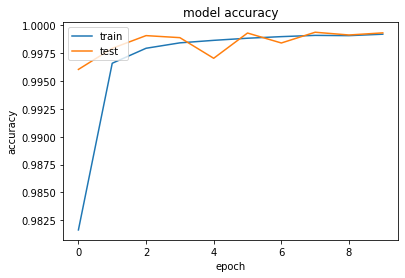

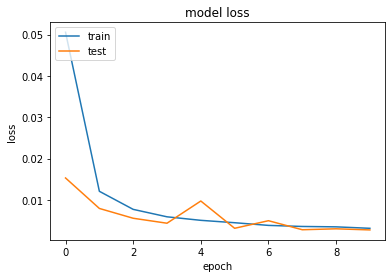

In [81]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()